<a href="https://colab.research.google.com/github/Storm00212/QUANT/blob/main/Monte_carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-506423295.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


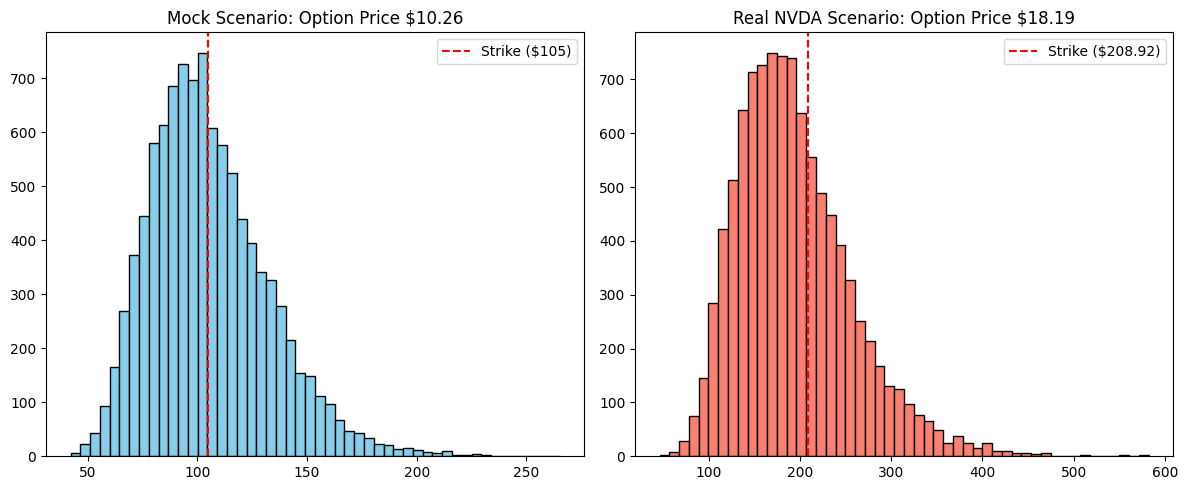

Mock Scenario Price: $10.26
Real NVDA Scenario Price: $18.19 (Based on 44.29% Volatility)


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def monte_carlo_option_price(S0, K, T, r, sigma, iterations=10000):
    # 1. THE MATH: Geometric Brownian Motion Formula
    # We simulate the price at the VERY END (at time T)
    # Formula: S_T = S_0 * exp((r - 0.5*sigma^2)*T + sigma*np.sqrt(T)*Z)
    z = np.random.standard_normal(iterations)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)

    # 2. THE PAYOFF: If price > Strike, we make money. Else, 0.
    payoffs = np.maximum(ST - K, 0)

    # 3. THE PRICE: Average of all payoffs, discounted back to today
    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price, ST

# --- SCENARIO 1: MOCK DATA (The Pokemon Card Example) ---
S0_mock, K_mock, T_mock, r_mock, vol_mock = 100, 105, 1, 0.05, 0.25
price_mock, paths_mock = monte_carlo_option_price(S0_mock, K_mock, T_mock, r_mock, vol_mock)

# --- SCENARIO 2: REAL DATA (Nvidia - NVDA) ---
ticker = "NVDA"
df = yf.download(ticker, period="1y")
# Calculate real historical volatility
returns = np.log(df['Close'] / df['Close'].shift(1))
real_vol = returns.std().item() * np.sqrt(252) # Convert Series to scalar
real_S0 = df['Close'].iloc[-1].item() # Convert Series to scalar
real_K = real_S0 * 1.10 # Looking for a 10% "Up" deal
real_r = 0.04 # Current approx risk-free rate

price_real, paths_real = monte_carlo_option_price(real_S0, real_K, 0.5, real_r, real_vol)

# --- VISUALIZATION ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(paths_mock, bins=50, color='skyblue', edgecolor='black')
plt.axvline(K_mock, color='red', linestyle='--', label=f'Strike (${K_mock})')
plt.title(f"Mock Scenario: Option Price ${price_mock:.2f}")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(paths_real, bins=50, color='salmon', edgecolor='black')
plt.axvline(real_K, color='red', linestyle='--', label=f'Strike (${real_K:.2f})')
plt.title(f"Real {ticker} Scenario: Option Price ${price_real:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Mock Scenario Price: ${price_mock:.2f}")
print(f"Real {ticker} Scenario Price: ${price_real:.2f} (Based on {real_vol:.2%} Volatility)")